In [66]:
import pandas as pd
from pyecharts.charts import Graph
from pyecharts import options as opts

In [67]:
data = pd.read_csv("data/influence_data.csv")
data

,inf_id,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,flw_id,follower_id,follower_name,follower_main_genre,follower_active_start
0,4010,759491,The Exploited,Pop/Rock,1980,0,74,Special Duties,Pop/Rock,1980
1,219,25462,Tricky,Electronic,1990,1,335,PJ Harvey,Pop/Rock,1990
2,559,66915,Bob Dylan,Pop/Rock,1960,1,335,PJ Harvey,Pop/Rock,1990
3,590,71209,Leonard Cohen,Pop/Rock,1950,1,335,PJ Harvey,Pop/Rock,1990
4,762,91438,The Gun Club,Pop/Rock,1980,1,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...,...,...
42765,3302,580300,Sufjan Stevens,Pop/Rock,1990,5601,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,2081,261309,Vybz Kartel,Reggae,2000,5602,3670556,Trinidad Cardona,R&B;,2010
42767,2837,467203,Michael Jackson,R&B;,1960,5602,3670556,Trinidad Cardona,R&B;,2010
42768,5374,2518003,Popcaan,Reggae,2000,5602,3670556,Trinidad Cardona,R&B;,2010


In [5]:
iftofl = data[['influencer_id','follower_id']]

In [28]:
genre_map={}
t=0
for i in set(data['influencer_main_genre'])|set(data['follower_main_genre']):
    genre_map[i]=t
    t+=1
genre_map

{'Blues': 0,
 'Stage & Screen': 1,
 'Religious': 2,
 'Jazz': 3,
 'R&B;': 4,
 'Pop/Rock': 5,
 'Classical': 6,
 'Vocal': 7,
 'Reggae': 8,
 "Children's": 9,
 'New Age': 10,
 'Avant-Garde': 11,
 'Electronic': 12,
 'Latin': 13,
 'Comedy/Spoken': 14,
 'Easy Listening': 15,
 'Unknown': 16,
 'Folk': 17,
 'International': 18,
 'Country': 19}

In [41]:
t = 0
len(data['influencer_name'].unique())

3761

In [68]:
# mmp={}
# for i in range(5602):
#     flag=0
#     for j in range(len(data)):
#         if data['inf_id'][j]==i:
#             mmp[i]=data['influencer_main_genre']
#             break
#         elif data['flw_id'][j]==i:
#             mmp[i]=data['follower_main_genre']
#             break
# mmp
mmp={}
for i in range(len(data)):
    mmp[data['influencer_name'][i]]=genre_map[data['influencer_main_genre'][i]]
    mmp[data['follower_name'][i]]=genre_map[data['follower_main_genre'][i]]
mmp

{'The Exploited': 5,
 'Special Duties': 5,
 'Tricky': 12,
 'PJ Harvey': 5,
 'Bob Dylan': 5,
 'Leonard Cohen': 5,
 'The Gun Club': 5,
 'Chrissie Hynde': 5,
 'Crime & the City Solution': 5,
 'Lesley Gore': 5,
 'Massive Attack': 12,
 'Nick Cave': 5,
 'The Raincoats': 5,
 'Pretenders': 5,
 'Tom Waits': 5,
 'Marianne Faithfull': 5,
 'Patti Smith': 5,
 'Sonic Youth': 5,
 'Pere Ubu': 5,
 'Pixies': 5,
 'The Smiths': 5,
 'X': 5,
 'Captain Beefheart': 5,
 'Bad Brains': 5,
 'P.O.D.': 5,
 'Black Flag': 5,
 'Korn': 5,
 'Faith No More': 5,
 'Eek-A-Mouse': 8,
 'Santana': 5,
 'Primus': 5,
 'Metallica': 5,
 '311': 5,
 'Suicidal Tendencies': 5,
 'Sepultura': 5,
 'Extreme': 5,
 'Tool': 5,
 'Fishbone': 5,
 "Jane's Addiction": 5,
 'Living Colour': 5,
 'Rage Against the Machine': 5,
 'Red Hot Chili Peppers': 5,
 'BÃ©la Fleck': 3,
 'Tony Furtado': 5,
 'Sam Bush': 19,
 'Trey Anastasio': 5,
 'Alice Cooper': 5,
 'Soundgarden': 5,
 'Spinal Tap': 14,
 'Blue Cheer': 5,
 'Blue Ã–yster Cult': 5,
 'Killing Joke': 5,


In [77]:
# store mmp
# f = open('art_gen_map.csv','a+')
# for i in mmp.keys():
#     f.write(i + ",%d"%mmp[i]+ "\n")
# f.close()
cnm = pd.DataFrame({'name':list(mmp.keys()),'genre':list(mmp.values())})
cnm.groupby('genre').count()

,name
genre,
0,100
1,50
2,88
3,402
4,676
5,2787
6,28
7,162
8,141


In [64]:
nodes=[]
for i in set(data['influencer_name'])|set(data['follower_name']):
    nodes.append(opts.GraphNode(name=i,category=mmp[i]))
links = []
for i in range(len(data)):
    links.append(opts.GraphLink(source=data['influencer_name'][i],target=data['follower_name'][i]
#                                 ,value=genre_map[data['influencer_main_genre'][i]]))
                               )
                )
categories = []
for i in sorted(genre_map.items(),key=lambda x:x[1]):
    categories.append(opts.GraphCategory(name=i[0]))

In [78]:
graph = Graph()
graph.add("",
         nodes=nodes,
         links=links,
         repulsion=500,
          categories=categories,
#           is_focusnode=True,
#           is_roam=True,
          label_opts=opts.LabelOpts(is_show=False)
         )
graph.set_global_opts(
#     visualmap_opts=opts.VisualMapOpts(
#         is_piecewise=True,
# #         pieces=pieces
#     )
)
graph.render('hhh.html')

/home/hjy/.local/lib/python3.6/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'/home/hjy/桌面/2021_MCM_ICM/hhh.html'

In [8]:
# states_needed = set(['北京', '上海', '广州', '深圳', '杭州', '南京', '石家庄', '银川'])

# stations = {}
# stations['kone'] = set(['北京', '上海', '广州'])
# stations['ktwo'] = set(['北京''杭州', '南京'])
# stations['kthree'] = set(['广州', '深圳', '杭州'])
# stations['kfour'] = set(['北京', '银川'])
# stations['kfive'] = set(['石家庄', '银川'])

# final_stations = set()

# while states_needed:
#         best_station = None
#         states_covered = set()
#         for station, states in stations.items():
#                 covered = states_needed & states
#                 if len(covered) > len(states_covered):
#                         best_station = station
#                         states_covered = covered
#         states_needed -= states_covered
#         final_stations.add(best_station)

# print(final_stations)

{'kone', 'kfive', 'kthree', 'ktwo'}


In [23]:
j = 0
f = open('genremap.csv','a+')
for i in set(data['influencer_main_genre'])|set(data['influencer_main_genre']):
    f.write("%s,%d\n"%(i,j))
    j+=1
f.close()

In [79]:
import seaborn as sns
sns.color_palette(n_colors=10)


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

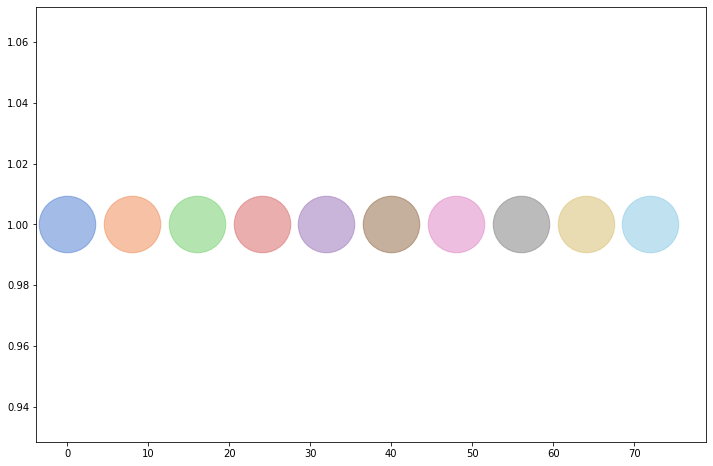

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
colors = sns.color_palette('muted').as_hex()
for i in range(len(colors)):
    plt.scatter(i*8,1,c=colors[i],s=3200,alpha=0.5)
plt.savefig('colorpalette.jpg')
